In [1]:
import pandas as pd
import numpy as np

#Local PY files
from cleaning_functions import *
from random_lumberjacks.src.random_lumberjacks.model.model_classes import *
from random_lumberjacks.src.random_lumberjacks.visualization.visualization_functions import *

/home/corey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
#Imports the dataframes
dffo = pd.read_csv("data/submission_format.csv")
dftr = pd.read_csv("data/training_set_features.csv")
dfte = pd.read_csv("data/test_set_features.csv")
dfla = pd.read_csv("data/training_set_labels.csv")

df = pd.merge(dftr, dfla, on="respondent_id")
df = df.set_index("respondent_id")

In [9]:
#Cleaning steps to do before column names are established.
df = initial_cleaning(df)

#Lists of columns to be fed into the model processor object and the functions that
#manage imputed values for the nans.
binary_columns = ['behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'homeowner']
ordinal_columns = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc']
continuous_columns = ["household_adults", "household_children"]

#Function to generate a dictionary that manages impute strategies depending on
#the type of data.
impute_dict = gen_impute_dict(binary_columns, ordinal_columns, continuous_columns)

#Cleans the rest of the data and stores the fitted imputer objects into a list for later use.
df, imputes = fit_clean_data(df, impute_dict)

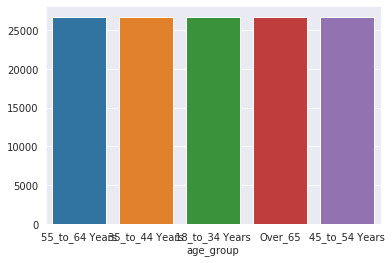

In [7]:
sns.barplot(x=df["age_group"], y=df["age_group"].count())

In [9]:
(df['missing_doctor_recc_h1n1'] == df['missing_doctor_recc_h1n1']).sum()

26707

<Figure size 1440x1080 with 0 Axes>

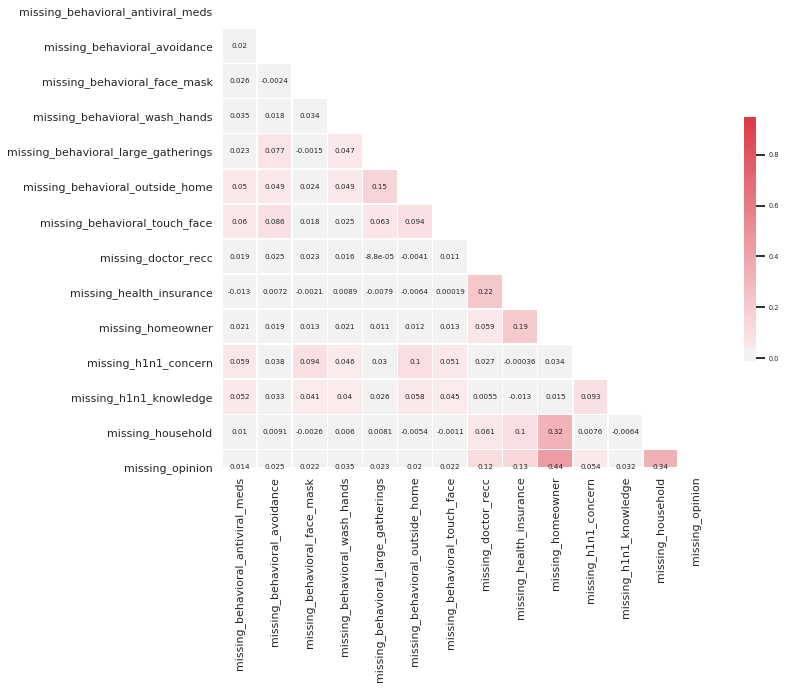

In [5]:
trimmed_heatmap(df, df[missing_dummies].columns, font_scale=.4, figsize=(20,15))

In [46]:
sns.pairplot(df[['column','column','column','column']],hue = 'column')

KeyError: "None of [Index(['column', 'column', 'column', 'column'], dtype='object')] are in the [columns]"

respondent_id
0        55_to_64 Years
1        35_to_44 Years
2        18_to_34 Years
3               Over_65
4        45_to_54 Years
              ...      
26702           Over_65
26703    18_to_34 Years
26704    55_to_64 Years
26705    18_to_34 Years
26706           Over_65
Name: age_group, Length: 26707, dtype: object

In [44]:


df["age_group"].unique()
age_dict {}

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [ ]:
df = get_imputer_objs(df, impute_dict, imputes)

In [6]:
missing_dummies = extract_column_names(df, "^missing")
missing_dummies

Index(['missing_behavioral_antiviral_meds', 'missing_behavioral_avoidance',
       'missing_behavioral_face_mask', 'missing_behavioral_wash_hands',
       'missing_behavioral_large_gatherings',
       'missing_behavioral_outside_home', 'missing_behavioral_touch_face',
       'missing_doctor_recc', 'missing_chronic_med_condition',
       'missing_health_worker', 'missing_health_insurance',
       'missing_homeowner', 'missing_h1n1_concern', 'missing_h1n1_knowledge',
       'missing_household', 'missing_opinion'],
      dtype='object')

In [10]:
#Creating column selection dictionaries for the data from lists of column names.

#Lists to go in the dictionaries.

missing_dummies = extract_column_names(df, "^missing")
target_col1 = "h1n1_vaccine"
target_col2 = "seasonal_vaccine"
target_cols = [target_col1, target_col2]
untr = ['household_adults', 'household_children',]
nom = df.columns.drop([*untr, *binary_columns, *target_cols, *missing_dummies])
# nom = df.columns.drop(pd.Index([*untr, *target_cols])).to_numpy().tolist()
# polyc = [*nom, *pay_dummies, "PAY_0"]
#The dicts that come into the arguments.

categorical = {
    "nominal_features":nom, "standard_dummies": binary_columns, "impute_dummies":missing_dummies
}

continuous = {"untransformed":untr}
polynomial = {"method":"eliminate", "columns":[]}

In [14]:
print_full(pd.Series(data.get_df().columns))

0                          household_adults
1                        household_children
2                 behavioral_antiviral_meds
3                      behavioral_avoidance
4                      behavioral_face_mask
5                     behavioral_wash_hands
6               behavioral_large_gatherings
7                   behavioral_outside_home
8                     behavioral_touch_face
9                          doctor_recc_h1n1
10                     doctor_recc_seasonal
11                    chronic_med_condition
12                     child_under_6_months
13                            health_worker
14                         health_insurance
15                                homeowner
16        missing_behavioral_antiviral_meds
17             missing_behavioral_avoidance
18             missing_behavioral_face_mask
19            missing_behavioral_wash_hands
20      missing_behavioral_large_gatherings
21          missing_behavioral_outside_home
22            missing_behavioral

In [12]:
data = DataPreprocessor(df, target_col1, categorical, continuous, polynomial, True, True,random_state=124)
data.data_preprocessing(balance_class=False, scale_type=False, poly_degree=False)
data.get_df()

Creating Dummies
Skipping polynomial features
Skipping class imbalance functions
No scaling specified
Skipping scaling


,household_adults,household_children,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_unknown,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,h1n1_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
358,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
20097,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
24982,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
12299,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
8759,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10407,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,1
7443,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
16022,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0


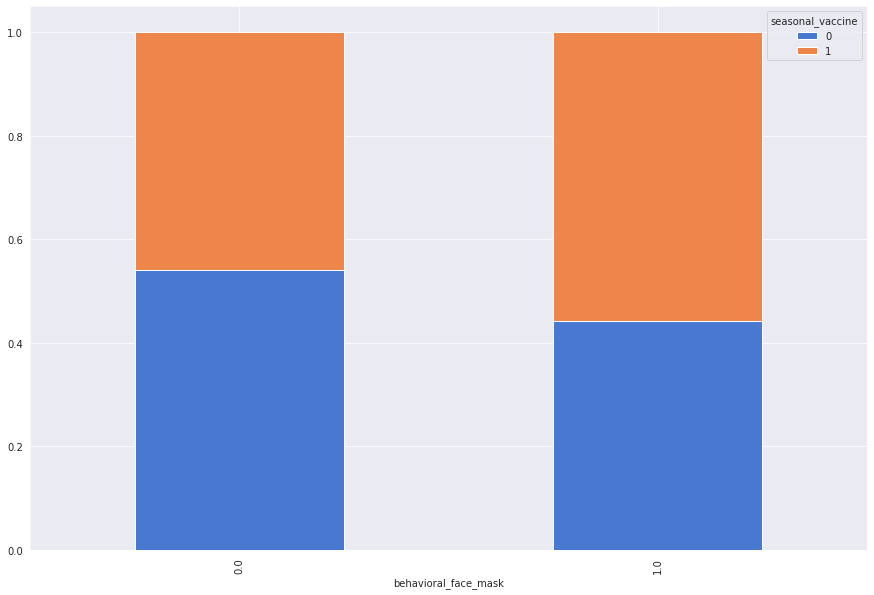

In [32]:
plot_stacked_proportion(df, "behavioral_face_mask", target_col, 1)